In [129]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [130]:
import yaml
 
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Yaml configuration file not found!")

In [131]:
config

{'input_data': {'file': '../data/raw/salaries.csv'},
 'output_data': {'file': '../data/clean/AI_ML_Salaries_clean.csv'}}

In [132]:
df = pd.read_csv(config['output_data']['file'])
df

,Year,Experience_Level,Employment_Type,Position,Currency,Salary,Country,Remote_Amount,Company_Size
0,2025,Senior Level,Full-time,"Products, Research & Development",USD,170000,US,0,Medium
1,2025,Senior Level,Full-time,"Products, Research & Development",USD,110000,US,0,Medium
2,2025,Senior Level,Full-time,"Products, Research & Development",USD,170000,US,0,Medium
3,2025,Senior Level,Full-time,"Products, Research & Development",USD,110000,US,0,Medium
4,2025,Senior Level,Full-time,"Products, Research & Development",USD,143000,US,0,Medium
...,...,...,...,...,...,...,...,...,...
65872,2021,Senior Level,Full-time,"Data Science, Engineers & Analytics",USD,165000,US,100,Large
65873,2020,Senior Level,Full-time,"Data Science, Engineers & Analytics",USD,412000,US,100,Large
65874,2021,Mid Level,Full-time,"Data Science, Engineers & Analytics",USD,151000,US,100,Large
65875,2020,Entry Level,Full-time,"Data Science, Engineers & Analytics",USD,105000,US,100,Small


In [133]:
# Filter the DataFrame for salaries above 90,000
filtered_df = df[df['Salary'] > 60000]

# Generating a crosstab for 'Experience_Level' and 'Salary'
crosstab_experience_sal = pd.crosstab(df['Experience_Level'], df['Salary'])

# Generate a crosstab for 'Position' and 'Salary' for the filtered data
crosstab_salary = pd.crosstab(filtered_df['Position'], filtered_df['Salary'])

# Generating a crosstab for 'Company_Size' and 'Salary'
crosstab_company_sal = pd.crosstab(df['Company_Size'], df['Salary'])

# Generating a crosstab for 'Position' and 'Salary'
crosstab_position_year = pd.crosstab(df['Position'], df['Year'])

# Showing only numbers
only_num = df.select_dtypes("number")

# Showing only object
only_cat = df.select_dtypes("object")

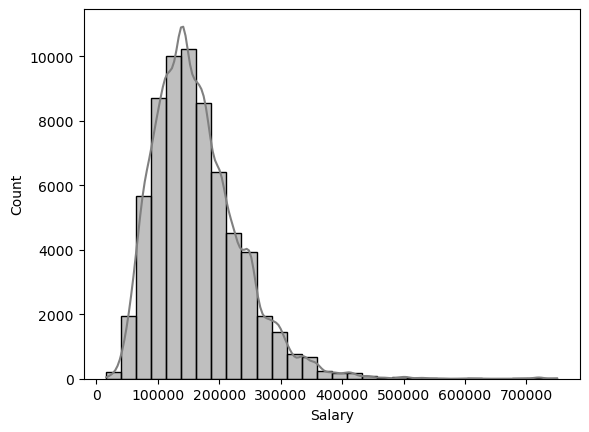

In [152]:
# Plotting a histogram for the 'Salary' column 

sns.histplot(df['Salary'], kde=True, bins=30, color="grey")
plt.show()

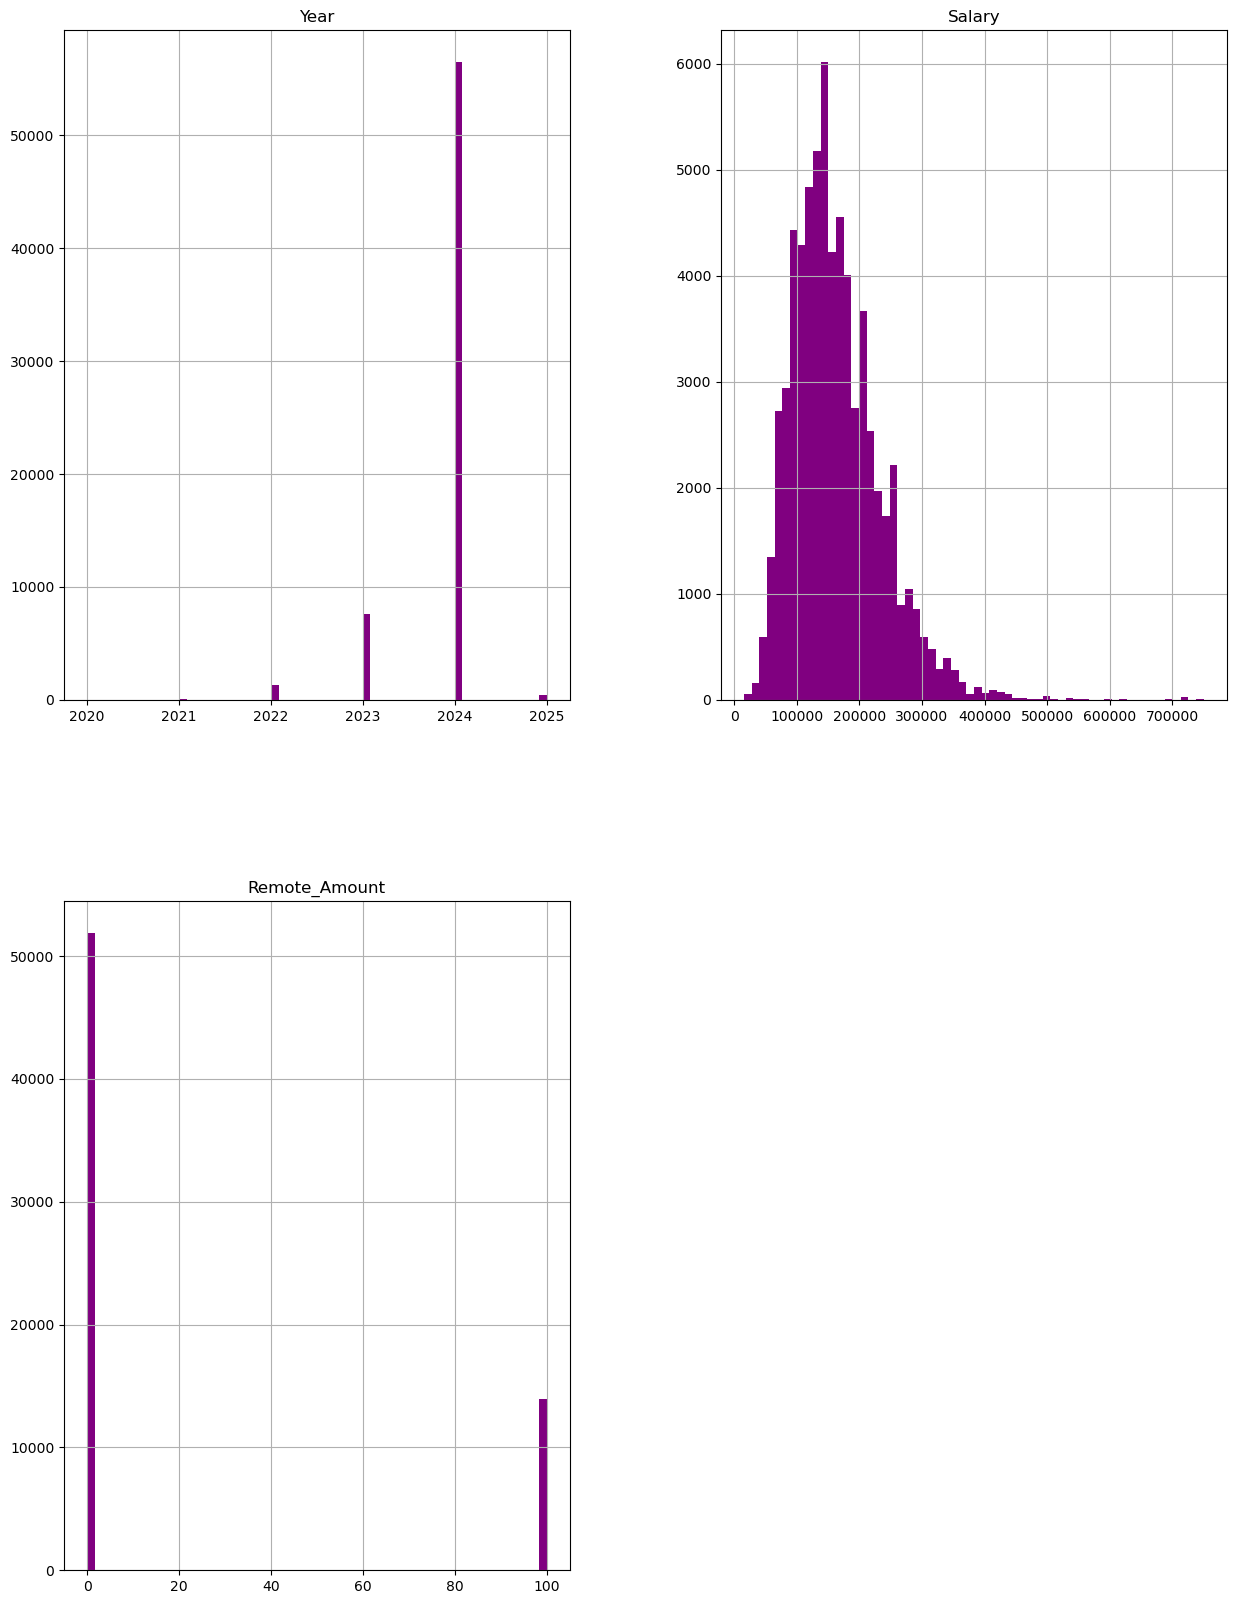

In [155]:

# Creating histograms for each numerical column in 'df_numerical'
only_num.hist(figsize=(15, 20), bins=60, color='purple', xlabelsize=10, ylabelsize=10)

# Show the plot
plt.show()

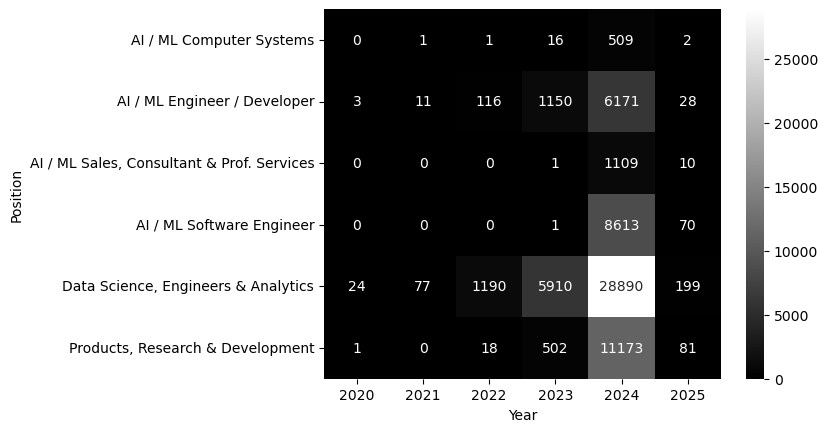

In [137]:
# Plotting a heatmap for the 'crosstab_result' data, annotating each cell with the value, using the "YlGnBu" color map and formatting numbers as integers
sns.heatmap(crosstab_position_year , annot=True, cmap="grey", fmt="d")
plt.show()

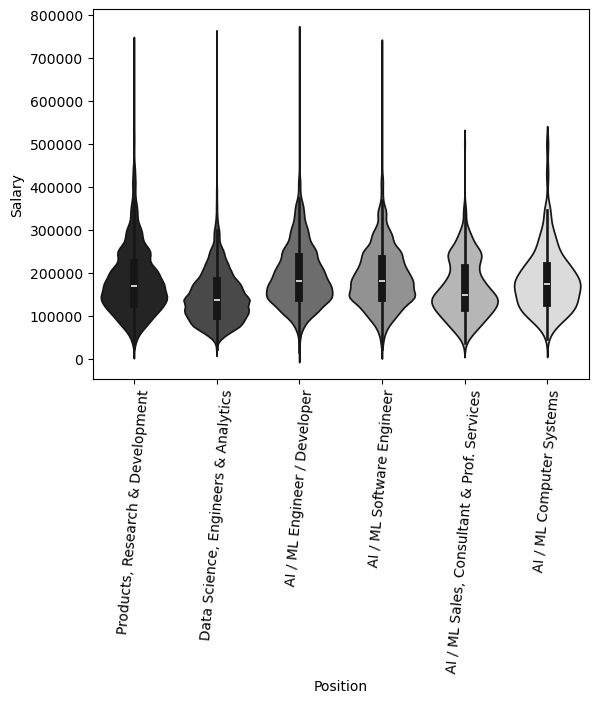

In [139]:
# Plotting a violin plot to visualize the distribution of 'Salary' for each 'Position' category
sns.violinplot(data=df, x='Position', y='Salary', palette="grey", hue='Position', legend=False)

# Rotate x-axis labels to be vertical
plt.xticks(rotation=85)  

# Show the plot
plt.show()

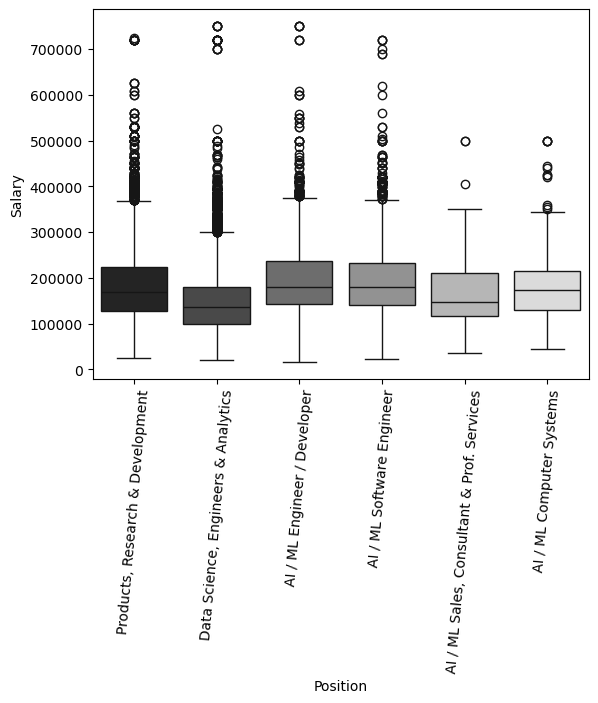

In [157]:
# Plotting a box plot to visualize the spread and outliers of 'Salary' for each 'Position' category, using the "coolwarm" color palette
sns.boxplot(data=df, x='Position', y='Salary', palette="grey", hue='Position', legend=False)

# Rotate x-axis labels to be vertical
plt.xticks(rotation=85)  

plt.show()

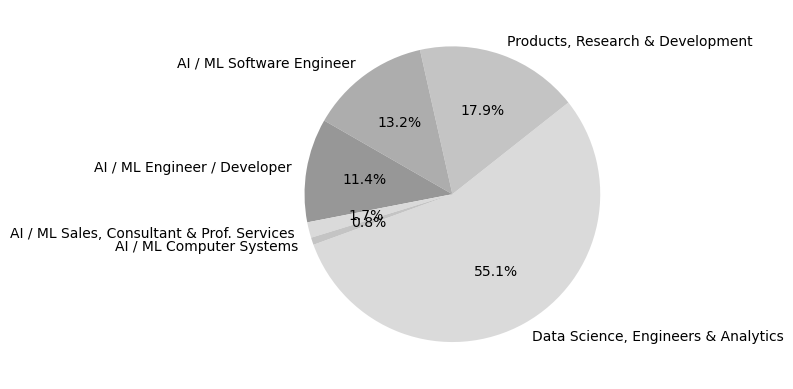

In [151]:


# Plotting a pie chart of the 'Position' column value counts, with percentage labels
df['Position'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=200,
    colors=sns.light_palette("grey", as_cmap=True)([0.2, 0.4, 0.6, 0.8])  # Shades of grey
)
plt.ylabel('')  
plt.show()

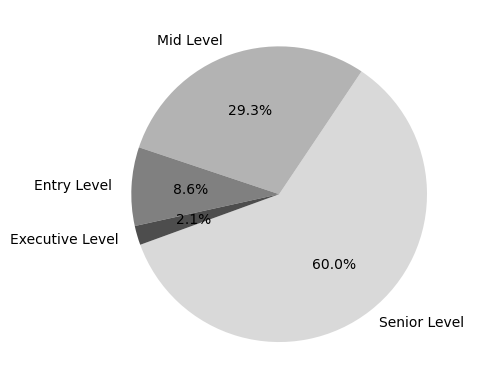

In [158]:
# Plotting a pie chart of the 'Experience_Level' column value counts, with percentage labels
df['Experience_Level'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=200,
    colors=['#d9d9d9', '#b3b3b3', '#808080', '#4d4d4d']  
)
plt.ylabel('')  
plt.show()

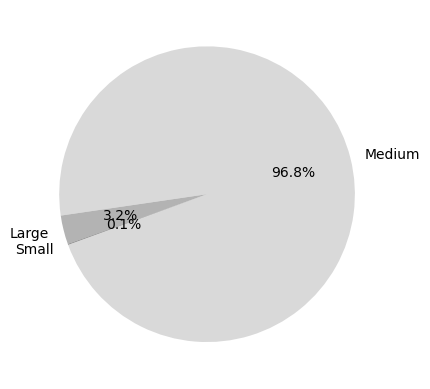

In [159]:
# Plotting a pie chart of the 'Company_Size' column value counts, with percentage labels
df['Company_Size'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=200,
    colors=['#d9d9d9', '#b3b3b3', '#808080', '#4d4d4d']  
)
plt.ylabel('')  
plt.show()

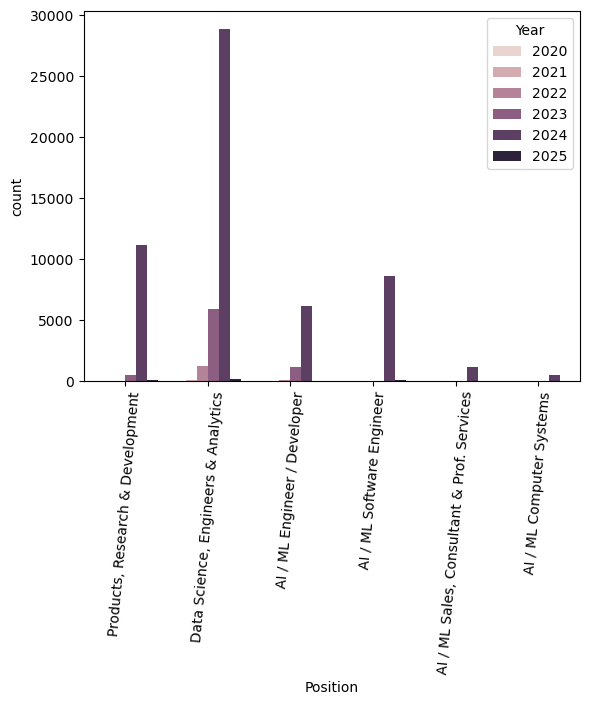

In [150]:
# Plotting a grouped bar chart
sns.countplot(data=df, x='Position', hue='Year')

# Rotate x-axis labels to be vertical
plt.xticks(rotation=85)  

plt.show()